# Employing Machine Learning Model for Soil Fertility Prediction
     By Eng NIYITEGEKA Janvier
     Email: nijas2012@yahoo.com
            
     Assistant Lecturer/RP/IPRC TUMBA

The dataset used in this research is accessible online and has been prepared by the Africa Soil Information Service (AfSIS) in their project dated from 2009 up two 2012. The dataset contains 3594 inputs (features) which include various soil mid-infrared absorbance capacity measured by using spectroscopy and spatial data collected by remote sensing data source (Satellite). The response or targeted values involve Calcium Ca,Phosphorous P and pH level. 

Let import python packages to be used througout the notebook

In [200]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torchvision.datasets.utils import download_url
from torch.utils.data import TensorDataset,DataLoader,random_split
import torch.nn as nn
import torch.nn.functional as F

# I. Exploring data using pandas and numpy packages

In [201]:
df=pd.read_csv('Soil_data.csv')

In [202]:
df.head()

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,...,REF2,REF3,REF7,RELI,TMAP,TMFI,Depth,Ca,P,pH
0,XNhoFZW5,0.302553,0.301137,0.299748,0.300354,0.302679,0.303799,0.301702,0.298936,0.298126,...,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843,0,-0.295749,-0.041336,-1.129366
1,9XNspFTd,0.270192,0.268555,0.266964,0.267938,0.271013,0.272346,0.269870,0.266976,0.266544,...,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843,1,-0.387442,-0.231552,-1.531538
2,WDId41qG,0.317433,0.316265,0.314948,0.315224,0.316942,0.317764,0.316067,0.313874,0.313301,...,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843,0,-0.248601,-0.224635,-0.259551
3,JrrJf1mN,0.261116,0.259767,0.258384,0.259001,0.261310,0.262417,0.260534,0.258039,0.257246,...,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843,1,-0.332195,-0.318014,-0.577548
4,ZoIitegA,0.260038,0.258425,0.256544,0.257030,0.259602,0.260786,0.258717,0.256352,0.255902,...,-0.528757,-0.795031,-0.780242,0.430513,0.190708,0.056843,0,-0.438350,-0.010210,-0.699135


As the 'PIDN' column contains only uniqueness data we can remove it from the training dataset

In [203]:
df=df.drop(columns=['PIDN'],axis=1)

In [204]:
df.head()

,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,...,REF2,REF3,REF7,RELI,TMAP,TMFI,Depth,Ca,P,pH
0,0.302553,0.301137,0.299748,0.300354,0.302679,0.303799,0.301702,0.298936,0.298126,0.298120,...,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843,0,-0.295749,-0.041336,-1.129366
1,0.270192,0.268555,0.266964,0.267938,0.271013,0.272346,0.269870,0.266976,0.266544,0.266766,...,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843,1,-0.387442,-0.231552,-1.531538
2,0.317433,0.316265,0.314948,0.315224,0.316942,0.317764,0.316067,0.313874,0.313301,0.313296,...,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843,0,-0.248601,-0.224635,-0.259551
3,0.261116,0.259767,0.258384,0.259001,0.261310,0.262417,0.260534,0.258039,0.257246,0.257124,...,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843,1,-0.332195,-0.318014,-0.577548
4,0.260038,0.258425,0.256544,0.257030,0.259602,0.260786,0.258717,0.256352,0.255902,0.255822,...,-0.528757,-0.795031,-0.780242,0.430513,0.190708,0.056843,0,-0.438350,-0.010210,-0.699135


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Columns: 3597 entries, m7497.96 to pH
dtypes: float64(3596), int64(1)
memory usage: 31.8 MB


dataset contains 1157 rows with index ranges from 0 to 1156 and 3597 columns with 3594 training inputs columns and 3 outputs targets columns

Let create the training input dataset by removing all targets columns(calcium Ca Phosphorous P and pH level)

In [206]:
inputs_data=df.drop(columns=['Ca','P','pH'],axis=1)

In [207]:
inputs_data.head()

,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,...,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI,Depth
0,0.302553,0.301137,0.299748,0.300354,0.302679,0.303799,0.301702,0.298936,0.298126,0.298120,...,-0.716713,-0.090016,-0.861091,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843,0
1,0.270192,0.268555,0.266964,0.267938,0.271013,0.272346,0.269870,0.266976,0.266544,0.266766,...,-0.716713,-0.090016,-0.861091,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843,1
2,0.317433,0.316265,0.314948,0.315224,0.316942,0.317764,0.316067,0.313874,0.313301,0.313296,...,-1.282552,-0.088336,-0.935273,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843,0
3,0.261116,0.259767,0.258384,0.259001,0.261310,0.262417,0.260534,0.258039,0.257246,0.257124,...,-1.282552,-0.088336,-0.935273,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843,1
4,0.260038,0.258425,0.256544,0.257030,0.259602,0.260786,0.258717,0.256352,0.255902,0.255822,...,-1.206971,0.011420,-0.906182,-0.528757,-0.795031,-0.780242,0.430513,0.190708,0.056843,0


Creating targets variables. The following code generate phosphorus,potasium and calcium variables targets and check their corresponded shape

In [208]:
ph_y=df[['pH']]
p_y=df[['P']]
ca_y=df[['Ca']]
ph_y.shape,p_y.shape,ca_y.shape

((1157, 1), (1157, 1), (1157, 1))

In [209]:
ca_y.to_numpy()

array([[-0.29574924],
       [-0.38744188],
       [-0.24860129],
       ...,
       [-0.44644913],
       [-0.49301858],
       [-0.20897388]])

Throughout this notebook we are going to use PyTorch python package to implement a Neural Network model to predict calcium, potassiumand phosphorus quantinty contained in the given soil data.

However, PyTorch deals only with tensors. then we need to convert the given pandasdaframe tensors via numpy data.So the following code converts the data into numpy data to be converted next into tensors

The PyTorch is an open source neural networks library developed by facebook for implementing Deep learning framework

Converting inputs data into numpy data

In [210]:
inputs_array = inputs_data.to_numpy()
inputs_array

array([[0.302553  , 0.301137  , 0.299748  , ..., 0.19070813, 0.0568427 ,
        0.        ],
       [0.270192  , 0.268555  , 0.266964  , ..., 0.19070813, 0.0568427 ,
        1.        ],
       [0.317433  , 0.316265  , 0.314948  , ..., 0.19070813, 0.0568427 ,
        0.        ],
       ...,
       [0.146829  , 0.139909  , 0.133845  , ..., 1.53920841, 1.61802173,
        0.        ],
       [0.09191   , 0.0844446 , 0.0779918 , ..., 1.53920841, 1.61802173,
        1.        ],
       [0.471388  , 0.464764  , 0.459496  , ..., 1.53920841, 1.61802173,
        0.        ]])

Converting Targets variable into numpy data

In [211]:
targets_ca_array =ca_y.to_numpy()
targets_ph_array =ph_y.to_numpy()
targets_p_array =p_y.to_numpy()

In [212]:
targets_ca_array,targets_ph_array,targets_p_array

(array([[-0.29574924],
        [-0.38744188],
        [-0.24860129],
        ...,
        [-0.44644913],
        [-0.49301858],
        [-0.20897388]]),
 array([[-1.12936595],
        [-1.53153828],
        [-0.25955137],
        ...,
        [-0.40919689],
        [-0.19408146],
        [-0.54948957]]),
 array([[-0.04133638],
        [-0.23155201],
        [-0.22463507],
        ...,
        [-0.38026604],
        [-0.41830917],
        [-0.17967502]]))

Converting training inputs and corresponded targets into tensor data and then after check their type

In [213]:
inputs = torch.tensor(inputs_array,dtype=torch.float32)
ca_targets = torch.tensor(targets_ca_array,dtype=torch.float32)
ph_targets = torch.tensor(targets_ph_array,dtype=torch.float32)
p_targets = torch.tensor(targets_p_array,dtype=torch.float32)


inputs.dtype, ca_targets.dtype,ph_targets.dtype,p_targets.dtype


(torch.float32, torch.float32, torch.float32, torch.float32)

Dividing the given dataset into three separate dataset using TensorDataset package fromPyTorch Class.

In [214]:
#Building Calcium dataset
ca_dataset =TensorDataset(inputs,ca_targets)

In [215]:
#Building pH level dataset
ph_dataset =TensorDataset(inputs,ph_targets)

In [216]:
#Building Phosphorous dataset
p_dataset =TensorDataset(inputs,p_targets)

Splitting the datasets into training and valiadation datasets using random_split package from PyTorch Class

In [217]:
num_rows=len(df)
num_rows

1157

In [218]:
val_percent = 0.25 # between 0.1 and 0.2
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size

In [219]:
#Calcium training and validation data
train_ds_ca, val_ds_ca = random_split(ca_dataset,[train_size,val_size]) # Use the random_split function to split dataset into 2 parts of the desired length

In [220]:
#Phosphorous training and validation data
train_ds_p, val_ds_p = random_split(p_dataset,[train_size,val_size]) # Use the random_split function to split dataset into 2 parts of the desired length

In [221]:
#pH Level training and validation data
train_ds_ph, val_ds_ph = random_split(ph_dataset,[train_size,val_size]) # Use the random_split function to split dataset into 2 parts of the desired length

Creating DataLoaders using DataLoader package from PyTorch Class. This might help to load data into batches for saving the memory usage

In [222]:
batch_size = 100

In [223]:
#Calcium dataloader
train_loader_ca = DataLoader(train_ds_ca, batch_size, shuffle=True)
val_loader_ca = DataLoader(val_ds_ca, batch_size)

In [224]:
#Phosphorous dataloader
train_loader_p = DataLoader(train_ds_p, batch_size, shuffle=True)
val_loader_p = DataLoader(val_ds_p, batch_size)

In [225]:
#pH level dataloader
train_loader_ph = DataLoader(train_ds_ph, batch_size, shuffle=True)
val_loader_ph = DataLoader(val_ds_ph, batch_size)

Save notebook to jovian for allowing public to have access on it

In [226]:
!pip install jovian --upgrade -q

In [227]:
import jovian

In [228]:
project_name = 'Soil Fertility Prediction By Janvier'

In [229]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "njanvier/soil-fertility-prediction-by-janvier" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/njanvier/soil-fertility-prediction-by-janvier


'https://jovian.ml/njanvier/soil-fertility-prediction-by-janvier'

# START TRAINING NETWORK

In [230]:
input_size = 3594
output_size = 1

Defining SoilModel Class and associated methods

In [333]:
class SoilModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(input_size,output_size)
        
    def forward(self, xb):
        out = self.linear1(xb)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out, targets)    # Calculate loss
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out, targets)    # Calculate loss
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result):
        if epoch%50==0:
            print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}".format(epoch, result['train_loss'],result['val_loss']))
    
model = SoilModel()

defining training and evaluation methods

In [334]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    train_loss = []
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            train_loss.append(loss)
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_loss).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Start training model to predict Calcium quantity contained in the given samples

In [335]:
result = evaluate(model, val_loader_ca)
result

{'val_loss': 1.9260133504867554}

In [336]:
history1 = fit(1000, 0.01, model, train_loader_ca, val_loader_ca)

Epoch [0], train_loss: 165.9518, val_loss: 156.9157
Epoch [50], train_loss: 5.9853, val_loss: 0.5704
Epoch [100], train_loss: 3.1449, val_loss: 0.2608
Epoch [150], train_loss: 2.1683, val_loss: 0.3059
Epoch [200], train_loss: 1.6954, val_loss: 0.2120
Epoch [250], train_loss: 1.4465, val_loss: 0.1993
Epoch [300], train_loss: 1.3085, val_loss: 0.3068
Epoch [350], train_loss: 1.2015, val_loss: 1.1377
Epoch [400], train_loss: 1.1199, val_loss: 1.6957
Epoch [450], train_loss: 1.0597, val_loss: 1.7776
Epoch [500], train_loss: 1.0220, val_loss: 0.1871
Epoch [550], train_loss: 0.9723, val_loss: 1.9161
Epoch [600], train_loss: 0.9378, val_loss: 0.4848
Epoch [650], train_loss: 0.9092, val_loss: 0.4341
Epoch [700], train_loss: 0.8843, val_loss: 0.4046
Epoch [750], train_loss: 0.8717, val_loss: 0.3027
Epoch [800], train_loss: 0.8467, val_loss: 2.0943
Epoch [850], train_loss: 0.8319, val_loss: 0.9167
Epoch [900], train_loss: 0.8154, val_loss: 0.3779
Epoch [950], train_loss: 0.8002, val_loss: 0.1931

In [337]:
result = evaluate(model, val_loader_ca)
result

{'val_loss': 0.47536396980285645}

Plot Training graph of  Calcium

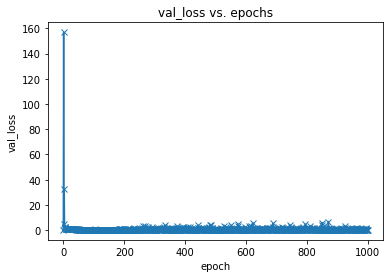

In [338]:
losses = [r['val_loss'] for r in [result]+ history1]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs');

Start training model to predict Phosphorous quantity contained in the given samples

In [339]:
result = evaluate(model, val_loader_p)
result

{'val_loss': 2.256542921066284}

In [340]:
history2 = fit(500, 0.01, model, train_loader_p, val_loader_p)

Epoch [0], train_loss: 162.9697, val_loss: 172.9539
Epoch [50], train_loss: 6.7063, val_loss: 1.4723
Epoch [100], train_loss: 3.9066, val_loss: 1.3186
Epoch [150], train_loss: 3.0019, val_loss: 1.2835
Epoch [200], train_loss: 2.5627, val_loss: 1.4228
Epoch [250], train_loss: 2.3423, val_loss: 1.4785
Epoch [300], train_loss: 2.1973, val_loss: 1.2896
Epoch [350], train_loss: 2.0845, val_loss: 1.8810
Epoch [400], train_loss: 1.9920, val_loss: 1.8699
Epoch [450], train_loss: 1.9229, val_loss: 1.2987


Plot Training gragh of Phosphorous

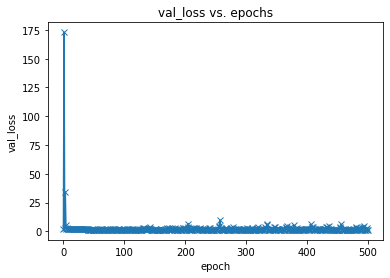

In [342]:
losses = [r['val_loss'] for r in [result]+ history2]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs');

Start training model to predict pH Level quantity contained in the given samples

In [343]:
result = evaluate(model, val_loader_ph)
result

{'val_loss': 0.7571859359741211}

In [344]:
history = fit(800, 0.01, model, train_loader_ph, val_loader_ph)

Epoch [0], train_loss: 173.0943, val_loss: 159.9278
Epoch [50], train_loss: 5.9891, val_loss: 0.2850
Epoch [100], train_loss: 3.1419, val_loss: 0.2712
Epoch [150], train_loss: 2.1753, val_loss: 0.2995
Epoch [200], train_loss: 1.7046, val_loss: 0.4011
Epoch [250], train_loss: 1.4664, val_loss: 0.7543
Epoch [300], train_loss: 1.3383, val_loss: 0.5425
Epoch [350], train_loss: 1.2437, val_loss: 0.7659
Epoch [400], train_loss: 1.1722, val_loss: 0.5639
Epoch [450], train_loss: 1.1255, val_loss: 0.2704
Epoch [500], train_loss: 1.0691, val_loss: 1.1358
Epoch [550], train_loss: 1.0298, val_loss: 0.8012
Epoch [600], train_loss: 0.9961, val_loss: 0.2436
Epoch [650], train_loss: 0.9713, val_loss: 0.4475
Epoch [700], train_loss: 0.9514, val_loss: 0.5652
Epoch [750], train_loss: 0.9311, val_loss: 0.3378


In [345]:
result = evaluate(model, val_loader_ph)
result

{'val_loss': 0.48415300250053406}

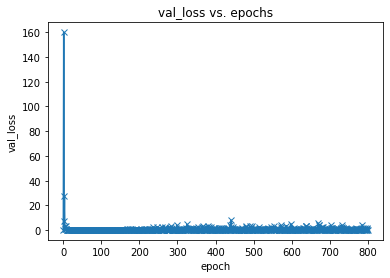

In [346]:
losses = [r['val_loss'] for r in [result]+ history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs');

save notebook to jovian

In [347]:
project_name = 'Soil Fertility Prediction By Janvier'

In [349]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "njanvier/soil-fertility-prediction-by-janvier" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/njanvier/soil-fertility-prediction-by-janvier


'https://jovian.ml/njanvier/soil-fertility-prediction-by-janvier'